# Predicting the Price of a House Based on Various Predictors

### Introduction

It is no secret that the price of housing in the United States has skyrocketed in the past decade. Homeowners are continuously struggling to find a suitable home for their specific needs, that is within their personal budget. In this data science project, we are trying to determine:

Is it possible to predict the cost of a house based on area, number of bedrooms, number of bathrooms and number of stories?

The dataset being used for this analysis is called: Housing Prices Dataset which was obtained from Kaggle and contains data from 2021. The original dataset contained 13 columns, 1 of which is the price.


### Preliminary Exploratory Data Analysis
Below we have gotten our data from the web onto R, and have split our data in to training and testing data, with a 75/25 ratio

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

set.seed(9999)


Housing <- read_csv("https://raw.githubusercontent.com/jio7887oij/dsci-100-009-1/main/Housing.csv")

housing_split <- initial_split(Housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)
housing_train_visualization <- head(housing_train, n = 20)
housing_train_visualization

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished
3430000,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished
3395000,3640,2,1,1,yes,no,no,no,no,0,no,furnished
3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished


Modify the dataset based on proposal.

In [2]:
Housing <- Housing |>
    select(price, area, bedrooms, bathrooms, stories)

Below are scatter plots and bar graphs comparing the initial dataset with the predictors

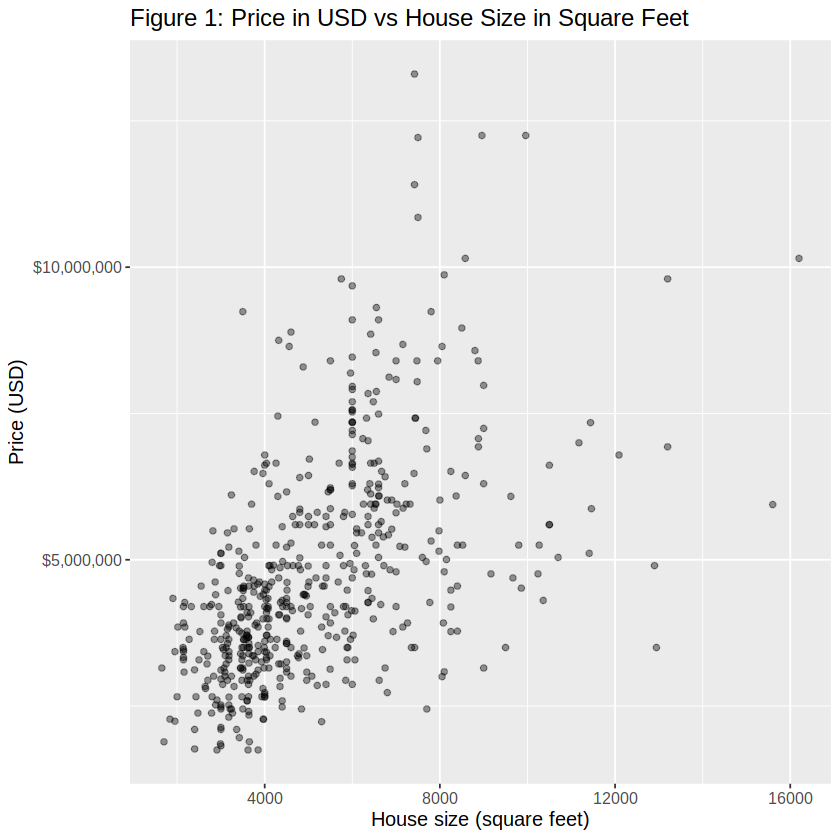

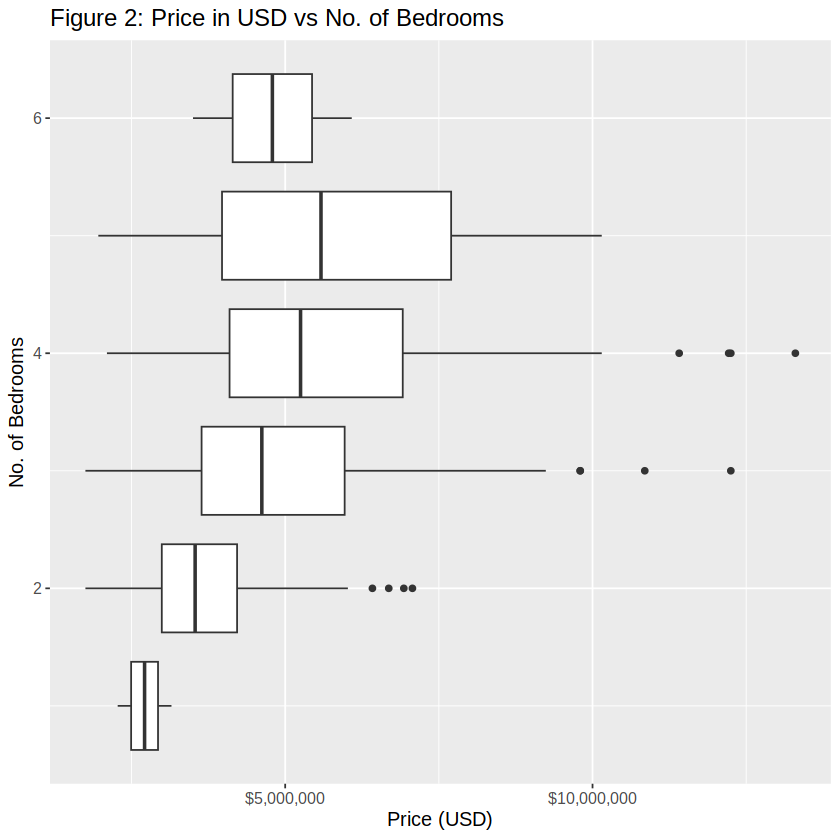

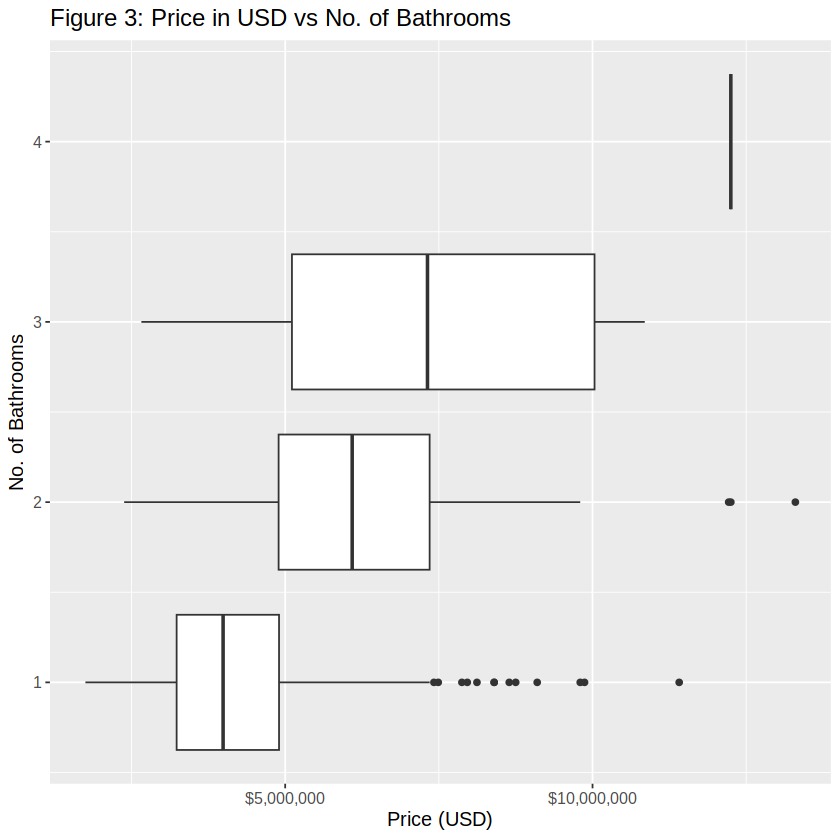

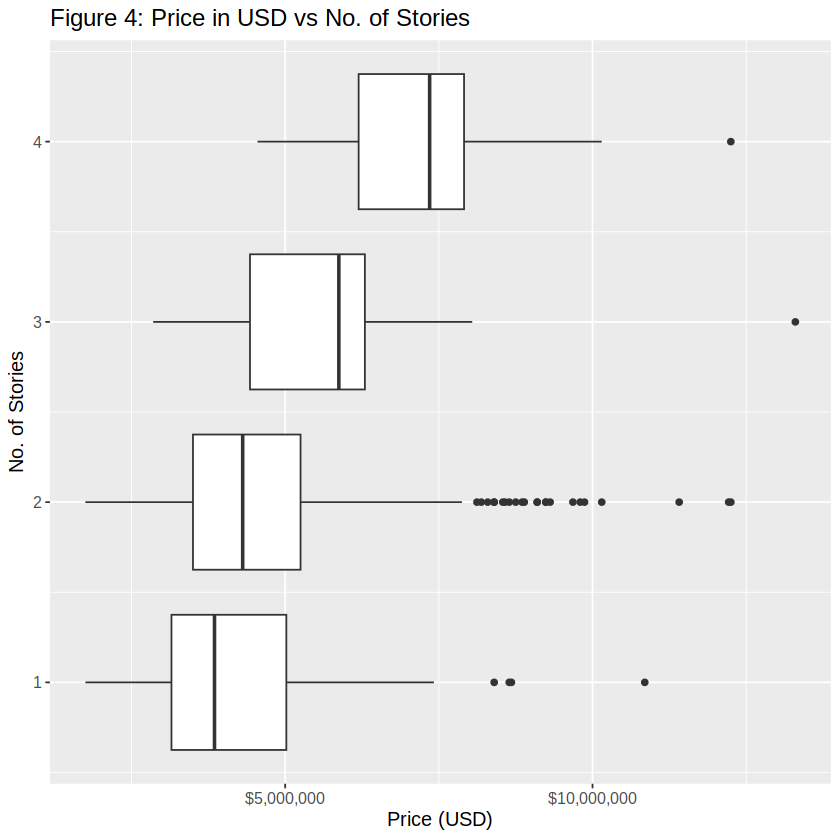

In [3]:
set.seed(9999)
preview_1 <- ggplot(Housing, aes(x = area, y = price)) +
  geom_point(alpha = 0.4) +
  ggtitle("Figure 1: Price in USD vs House Size in Square Feet") +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_1

preview_2 <- ggplot(Housing, aes(x = bedrooms, y = price, group = bedrooms)) +
  geom_boxplot() +
  ggtitle("Figure 2: Price in USD vs No. of Bedrooms") +
  xlab("No. of Bedrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_2 + coord_flip()

preview_3 <- ggplot(Housing, aes(x = bathrooms, y = price, group = bathrooms)) +
  geom_boxplot() +
  ggtitle("Figure 3: Price in USD vs No. of Bathrooms") +
  xlab("No. of Bathrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_3 + coord_flip()

preview_4 <- ggplot(Housing, aes(x = stories, y = price, group = stories)) +
  geom_boxplot() +
  ggtitle("Figure 4: Price in USD vs No. of Stories") +
  xlab("No. of Stories") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_4 + coord_flip()

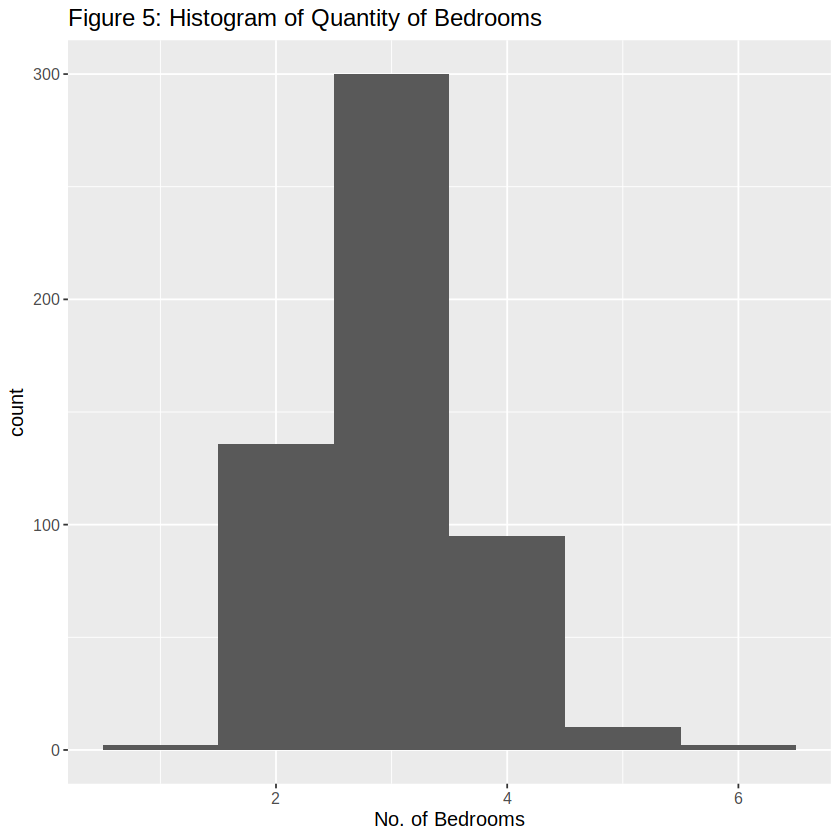

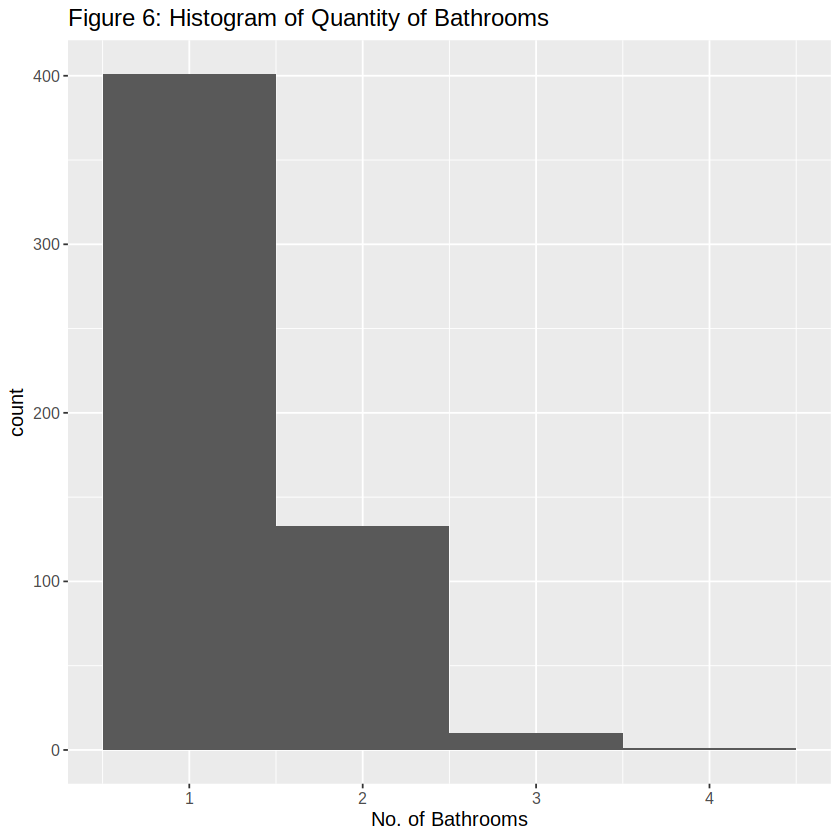

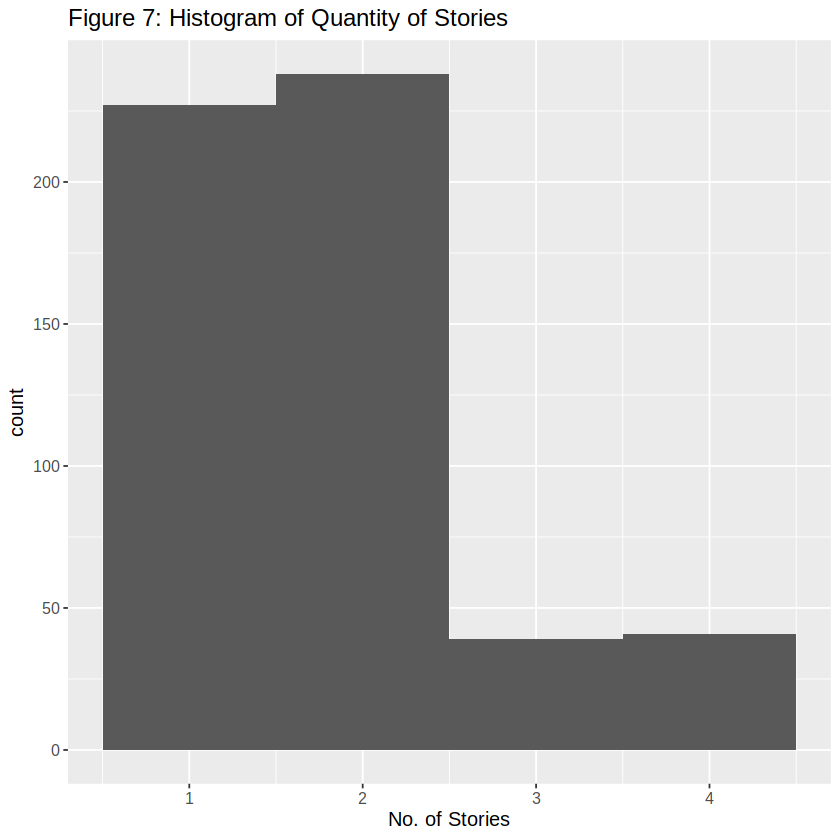

In [4]:
set.seed(9999)
bedroom_hg <-  ggplot(Housing, aes(x = bedrooms)) +
  geom_histogram(binwidth = 1) +
  ggtitle("Figure 5: Histogram of Quantity of Bedrooms") +
  xlab("No. of Bedrooms") +
  theme(text = element_text(size = 12))
bedroom_hg
bathroom_hg <-  ggplot(Housing, aes(x = bathrooms)) +
  geom_histogram(binwidth = 1) +
  ggtitle("Figure 6: Histogram of Quantity of Bathrooms") +
  xlab("No. of Bathrooms") +
  theme(text = element_text(size = 12))
bathroom_hg
stories_hg <-  ggplot(Housing, aes(x = stories)) +
  geom_histogram(binwidth = 1) +
  ggtitle("Figure 7: Histogram of Quantity of Stories") +
  xlab("No. of Stories") +
  theme(text = element_text(size = 12))
stories_hg

## Choosing 2 of 4 and Creating One Graph With 3 best fit lines.

In [5]:
set.seed(9999)
HousingSort <- Housing |>
    select(price, area, bedrooms) |>
    group_by(price, area) |>
    arrange(bedrooms) |>
    filter(bedrooms > 1 , bedrooms < 5)

HousingSort

price,area,bedrooms
<dbl>,<dbl>,<dbl>
7070000,8880,2
6930000,13200,2
6685000,6600,2
6419000,6750,2
6020000,6800,2
5600000,10500,2
5285000,4600,2
5110000,11410,2
5075000,5720,2


In [6]:
set.seed(9999)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(price ~ area + bedrooms, data = housing_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = housing_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         area     bedrooms  
   736432.7        379.1     700095.9  


In [7]:
set.seed(9999)
lm_mult_test_results <- lm_fit |>
    predict(housing_test) |>
    bind_cols(housing_test) |>
    metrics(truth = price, estimate = .pred)

lm_mult_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.552311e+06
rsq,standard,4.820625e-01
mae,standard,1.130012e+06


In [8]:
set.seed(9999)
mcoeffs <- lm_fit |>
    extract_fit_parsnip() |>
    tidy()
mcoeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),736432.665,320270.78162,2.299406,2.199121e-02
area,379.105,35.16079,10.782039,5.420518e-24
bedrooms,700095.870,97533.72084,7.177988,3.416407e-12


House Sale Price = β0 + β1
⋅
(
house size
)
+
β
2
⋅
(
number of bedrooms
)
,

House Sale Price = 736432.655 + 379.105*(House Area) + 700095.870*(Number of Bedrooms)

House Sale Price(2 Rooms) = 2136624.395 + 379.105*(House Area)

House Sale Price(3 Rooms) = 2836720.265 + 379.105*(House Area)

House Sale Price(4 Rooms) = 3536816.135 + 379.105*(House Area)

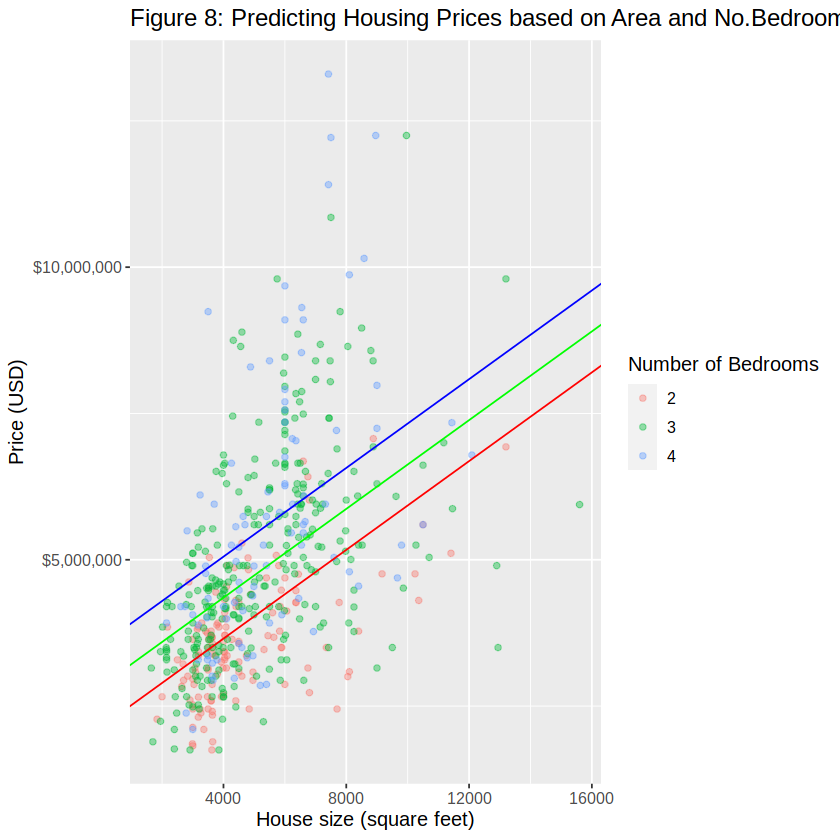

In [9]:
set.seed(9999)
housing_plot_final <- ggplot(HousingSort, aes(x = area, y = price, colour = factor(bedrooms))) +
  geom_point(alpha = 0.4) +
  geom_abline(intercept = 2136624.395, slope = 379.105, color = "red") +
  geom_abline(intercept = 2836720.265, slope = 379.105, color = "green") +
  geom_abline(intercept = 3536816.135, slope = 379.105, color = "blue") +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 8: Predicting Housing Prices based on Area and No.Bedrooms")

housing_plot_final +
    labs(
     colour = "Number of Bedrooms")